In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from textblob import Word
from wordcloud import WordCloud

In [24]:
df = pd.read_csv('../data/cleaned_data.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df = df.dropna()

In [25]:
len(df)

4412

In [26]:
df.head()

,ISCO,major_job,job,position,location,description
0,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Accelerator Physicist id54315,"Villigen PSI, Aargau",[' You have an academic degree in physics or e...
1,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Applied Physicist (Computing) (EP-LBC-2021-125...,Geneva,[' Be in charge of the development of applicat...
2,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Accelerator Physicist (BE-ABP-LNO-2021-122-LD)...,Geneva,[' Contribute to the maintenance and developme...
3,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Medical Devices Physicist,"Newton, Cambridgeshire",[' Agency: Newton Colmore Consulting Reference...
4,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Fluidics Physicist,Cambridge,[' Agency: Newton Colmore Consulting Reference...


In [27]:
df.description[1]

'[\' Be in charge of the development of application software, in the context of the needs of the LHCb core and distributed computing groups. Be able to act as liaison between the requirements of LHCb data analysts interfacing with LHCb distributed computing infrastructure. Be using, possibly refactoring, testing, diagnosing, optimizing and integrating existing software, and while doing so you are expected to know about software life-cycle tools and procedures. Be in charge of creating new software solutions, or fully replace existing ones. Work within a small team of applied physicists and software developers. \', \' Demonstrated working experience in software development using the Python programming language. Extensive hands-on experience of software and techniques for High Energy Physics data analysis. Experience with the DIRAC software is a plus. \', \' Development of application software: in particular for distributed computing. Knowledge of programming techniques and languages: (m

In [28]:
type(df.description[0])

str

In [29]:
data = df.copy()

In [30]:
data = data.drop(columns = ["ISCO", "major_job", "location"])

In [31]:
data

,job,position,description
0,physicist,Accelerator Physicist id54315,[' You have an academic degree in physics or e...
1,physicist,Applied Physicist (Computing) (EP-LBC-2021-125...,[' Be in charge of the development of applicat...
2,physicist,Accelerator Physicist (BE-ABP-LNO-2021-122-LD)...,[' Contribute to the maintenance and developme...
3,physicist,Medical Devices Physicist,[' Agency: Newton Colmore Consulting Reference...
4,physicist,Fluidics Physicist,[' Agency: Newton Colmore Consulting Reference...
...,...,...,...
4407,washer,Dishwasher employee,[' Eye for detail and through! You have a real...
4408,washer,Detail Technician/Fleet Washer/Truck Washer/Au...,[' Paid Training Direct Care (health) Paid Vac...
4409,washer,Detail Technician/Fleet Washer/Truck Washer/Au...,[' Paid Training Direct Care (health) Paid Vac...
4410,washer,Detail Technician/Fleet Washer/Truck Washer/Au...,[' Paid Training Direct Care (health) Paid Vac...


In [32]:
data.groupby("job").count()

,position,description
job,,
accountant,45,45
administrative assistant,20,20
administrative manager,14,14
adviser,17,17
application developer,25,25
...,...,...
verification engineer,52,52
veterinary surgeon,57,57
video editor,45,45


<AxesSubplot:>

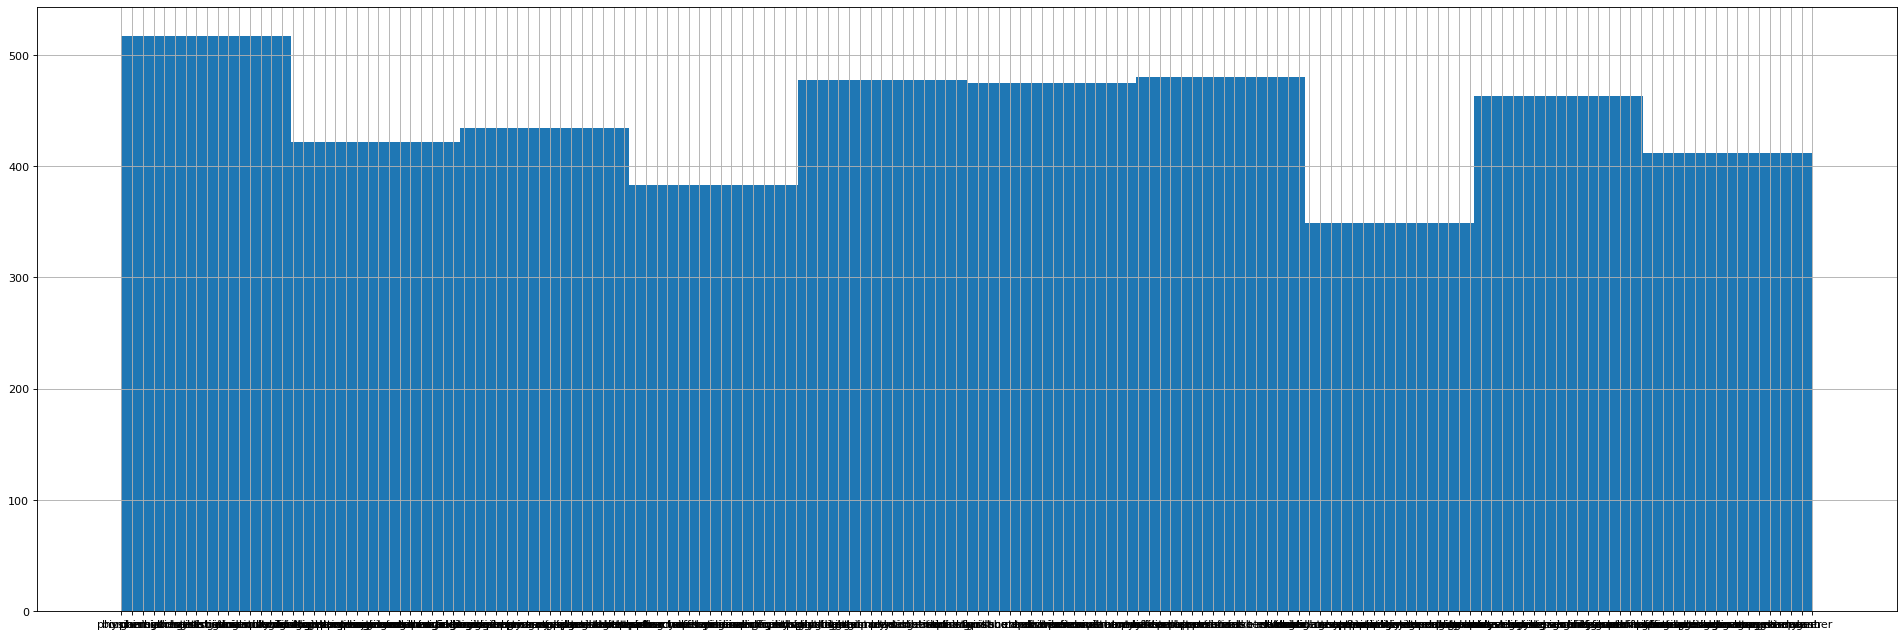

In [33]:
fig=plt.figure(figsize=(30, 10), dpi= 80, facecolor='w', edgecolor='k')
data.job.hist()

In [34]:
from ast import literal_eval
df['info'] = df['info'].apply(literal_eval)

KeyError: 'info'

In [35]:
df['info'] = df['info'].apply(filter_lists)
df = df.dropna()

KeyError: 'info'

## Cleaning and remove few counts of Job Positions

In [ ]:
iscos = pd.read_csv('/home/macrodrigues/code/macrodrigues/skills_matcher/data/raw_data/raw_data_0.csv')

In [36]:
iscos = iscos.rename({'major_ISCO': 'ISCO'}, axis = 1)
iscos = iscos[['ISCO', 'major_jobs']]

NameError: name 'iscos' is not defined

In [37]:
df = df.merge(iscos, on='ISCO', how = 'inner')
df = df[['ISCO', 'major_jobs', 'careers', 'career_scraped', 'location_scraped', 'info']]

NameError: name 'iscos' is not defined

In [38]:
df = df.rename({'major_jobs': 'major_job', 'careers': 'job', 'career_scraped': 'position', 'location_scraped':'location', 'info': 'description'}, axis = 1)

In [39]:
df.groupby(['ISCO', 'major_job']).agg({'position': 'count'})

,,position
ISCO,major_job,
12,ADMINISTRATIVE AND COMMERCIAL MANAGERS,321
21,SCIENCE AND ENGINEERING PROFESSIONALS,885
22,HEALTH PROFESSIONALS,626
23,TEACHING PROFESSIONALS,252
24,BUSINESS AND ADMINISTRATION PROFESSIONALS,288
25,INFORMATION AND COMMUNICATIONS TECHNOLOGY PROFESSIONALS,447
31,SCIENCE AND ENGINEERING ASSOCIATE PROFESSIONALS,104
32,HEALTH ASSOCIATE PROFESSIONALS,73
33,BUSINESS AND ADMINISTRATION ASSOCIATE PROFESSIONALS,253


## Data Cleaning

# lower case, tabulation/spaces/lines, digits

In [40]:
## Lower case
data['description'] = data['description'].apply(lambda x: " ".join(x.lower()for x in x.split()))

## remove tabulation and punctuation
data['description'] = data['description'].str.replace('[^\w\s]',' ')

## digits
data['description'] = data['description'].str.replace('\d+', '')

/tmp/ipykernel_1348/2207432771.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['description'] = data['description'].str.replace('[^\w\s]',' ')
/tmp/ipykernel_1348/2207432771.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data['description'] = data['description'].str.replace('\d+', '')


In [41]:
data.head()

,job,position,description
0,physicist,Accelerator Physicist id54315,you have an academic degree in physics or e...
1,physicist,Applied Physicist (Computing) (EP-LBC-2021-125...,be in charge of the development of applicat...
2,physicist,Accelerator Physicist (BE-ABP-LNO-2021-122-LD)...,contribute to the maintenance and developme...
3,physicist,Medical Devices Physicist,agency newton colmore consulting reference...
4,physicist,Fluidics Physicist,agency newton colmore consulting reference...


In [42]:
data.description[1]

'   be in charge of the development of application software  in the context of the needs of the lhcb core and distributed computing groups  be able to act as liaison between the requirements of lhcb data analysts interfacing with lhcb distributed computing infrastructure  be using  possibly refactoring  testing  diagnosing  optimizing and integrating existing software  and while doing so you are expected to know about software life cycle tools and procedures  be in charge of creating new software solutions  or fully replace existing ones  work within a small team of applied physicists and software developers       demonstrated working experience in software development using the python programming language  extensive hands on experience of software and techniques for high energy physics data analysis  experience with the dirac software is a plus       development of application software  in particular for distributed computing  knowledge of programming techniques and languages   mainly

# -Delete nltk's defined stop words

In [43]:
stop = stopwords.words('english')
data['description'] = data['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [44]:
data.description[1]

'charge development application software context needs lhcb core distributed computing groups able act liaison requirements lhcb data analysts interfacing lhcb distributed computing infrastructure using possibly refactoring testing diagnosing optimizing integrating existing software expected know software life cycle tools procedures charge creating new software solutions fully replace existing ones work within small team applied physicists software developers demonstrated working experience software development using python programming language extensive hands experience software techniques high energy physics data analysis experience dirac software plus development application software particular distributed computing knowledge programming techniques languages mainly python use refactoring integration porting existing software knowledge application software life cycle tools procedures testing diagnosing optimization software achieving results structured organised approach towards work

# -Lemmatize text

In [45]:
#nltk lemmatizer

lemmatizer = WordNetLemmatizer()

In [47]:
data['description'] = data['description'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [107]:
data_lemma.description[1]

'charge development application software context need lhcb core distributed computing group able act liaison requirement lhcb data analyst interfacing lhcb distributed computing infrastructure using possibly refactoring testing diagnosing optimizing integrating existing software expected know software life cycle tool procedure charge creating new software solution fully replace existing one work within small team applied physicist software developer demonstrated working experience software development using python programming language extensive hand experience software technique high energy physic data analysis experience dirac software plus development application software particular distributed computing knowledge programming technique language mainly python use refactoring integration porting existing software knowledge application software life cycle tool procedure testing diagnosing optimization software achieving result structured organised approach towards work able set priority

In [51]:
data_wo_pos = data_lemma.drop(columns = "position")

In [52]:
data_wo_pos.head()

,job,description
0,physicist,academic degree physic engineering profound kn...
1,physicist,charge development application software contex...
2,physicist,contribute maintenance development optic model...
3,physicist,agency newton colmore consulting reference mdp...
4,physicist,agency newton colmore consulting reference fpc...


In [53]:
## jda stands for job description aggregated
jda = data_wo_pos.groupby(['job']).sum().reset_index()
print("Aggregated job descriptions: \n")
print(jda)

Aggregated job descriptions: 

                          job  \
0                  accountant   
1    administrative assistant   
2      administrative manager   
3                     adviser   
4       application developer   
..                        ...   
154     verification engineer   
155        veterinary surgeon   
156              video editor   
157                    washer   
158             web developer   

                                           description  
0    supporting cross functional team reach functio...  
1    support manager employee variety task related ...  
2    manage branch administration including branch ...  
3    customer service advisor operational hour mon ...  
4    profound knowledge visual studio c blazor asp ...  
..                                                 ...  
154  take full responsibility verification design b...  
155  hour week including weekend ooh varied caseloa...  
156  creating content fulfill company social medium...  
15

In [ ]:
## Visualize data
jobs_list = jda.job.unique().tolist()
for job in jobs_list:

    # Start with one review:
    text = jda[jda.job == job].iloc[0].description
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)
    print("\n***",job,"***\n")
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [ ]:
### Delete sentences of job description with (for skill description) unnecessary words, f.e. describing benefits (meals) 

In [63]:
jda.head(5)

,job,description
0,accountant,supporting cross functional team reach functio...
1,administrative assistant,support manager employee variety task related ...
2,administrative manager,manage branch administration including branch ...
3,adviser,customer service advisor operational hour mon ...
4,application developer,profound knowledge visual studio c blazor asp ...


In [64]:
#converting features to vectorizer
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(jda.description)

y = jda.job

#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42) 
print("train data shape: ",X_train.shape)
print("test data shape: ",X_test.shape)


train data shape:  (127, 19630)
test data shape:  (32, 19630)


<AxesSubplot:>

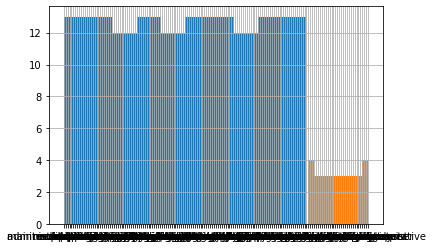

In [65]:
y_train.hist()
y_test.hist()

In [85]:
y_train.shape

(127,)

In [84]:
y_test.head(20)

78                       marketer
155            veterinary surgeon
128                security guard
55     field sales representative
94             night receptionist
29              computing teacher
147              testing engineer
51          environmental manager
98            operations engineer
141          switchboard operator
19                   cardiologist
60              geography teacher
15                     bookkeeper
65                 hydrogeologist
24        chief financial officer
30             conference manager
126                   salesperson
101               organic chemist
96                   nutritionist
16                     bus driver
Name: job, dtype: object

In [ ]:
nb_model = MultinomialNB()import pandas as pd

nb_model.fit(X_train, y_train)

y_predict = nb_model.predict(X_test)

In [92]:
nb_model.score(X_test,y_test)

0.0

In [93]:
print("Accuracy score is: ",accuracy_score(y_test, y_predict))
print("Classes: (to help read Confusion Matrix)\n", nb_model.classes_)
print("Confusion Matrix: ")

print(confusion_matrix(y_test, y_predict))
print("Classification Report: ")
print(classification_report(y_test, y_predict))

Accuracy score is:  0.0
Classes: (to help read Confusion Matrix)
 ['accountant' 'administrative assistant' 'administrative manager'
 'adviser' 'application developer' 'application engineer' 'art teacher'
 'attendant' 'audiologist' 'auditor' 'biochemist' 'biostatistician'
 'blockchain developer' 'buyer' 'cash manager' 'cashier' 'chemist'
 'chief accountant' 'civil engineer' 'cleaner' 'cleaning manager'
 'clinical physiologist' 'copywriter' 'customer adviser' 'cybersecurity'
 'data analyst' 'data engineer' 'data scientist' 'database developer'
 'database engineer' 'dealer' 'dental nurse' 'dentist'
 'development engineer' 'dietitian' 'distributor' 'doorman'
 'drama teacher' 'dumper driver' 'ecologist' 'environmental engineer'
 'epidemiologist' 'excavator operator' 'export sales manager' 'florist'
 'gardener' 'geneticist' 'geologist' 'group leader' 'hotel receptionist'
 'housekeeper' 'immunologist' 'inspection engineer' 'inspector'
 'instrument engineer' 'laboratory manager' 'language teac

## Name Entity Recognition

In [102]:
df.head()

,ISCO,major_job,job,position,location,description
0,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Accelerator Physicist id54315,"Villigen PSI, Aargau",[' You have an academic degree in physics or e...
1,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Applied Physicist (Computing) (EP-LBC-2021-125...,Geneva,[' Be in charge of the development of applicat...
2,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Accelerator Physicist (BE-ABP-LNO-2021-122-LD)...,Geneva,[' Contribute to the maintenance and developme...
3,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Medical Devices Physicist,"Newton, Cambridgeshire",[' Agency: Newton Colmore Consulting Reference...
4,21,SCIENCE AND ENGINEERING PROFESSIONALS,physicist,Fluidics Physicist,Cambridge,[' Agency: Newton Colmore Consulting Reference...


## Spacy model implementation

https://spacy.io/models/en
English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.